In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read the CSV file

In [141]:
df = pd.read_csv('cars-dataset.csv')

In [142]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [143]:
df.shape

(398, 8)

In [144]:
df.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [145]:
df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

# 5 Point Statistics about the Data

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


# Check Missing Values

In [147]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

# Check for Non-Numeric Entries

In [148]:
print(df[~df.applymap(np.isreal).all(1)])

                              car name  cyl   disp   hp    wt   acc  yr   mpg
0            chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1                    buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2                   plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3                        amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                          ford torino    8  302.0  140  3449  10.5  70  17.0
5                     ford galaxie 500    8  429.0  198  4341  10.0  70  15.0
6                     chevrolet impala    8  454.0  220  4354   9.0  70  14.0
7                    plymouth fury iii    8  440.0  215  4312   8.5  70  14.0
8                     pontiac catalina    8  455.0  225  4425  10.0  70  14.0
9                   amc ambassador dpl    8  390.0  190  3850   8.5  70  15.0
10                 dodge challenger se    8  383.0  170  3563  10.0  70  15.0
11                  plymouth 'cuda 340    8  340.0  160  3609   

In [149]:
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

car name    False
cyl          True
disp         True
hp          False
wt           True
acc          True
yr           True
mpg          True
dtype: bool

# Observations

1. The feature 'hp' contains non-numeric entries

Replace the No-numeric Entries with 0
-------------------------------------------------------

In [150]:
df['hp'] = df.hp.apply(lambda x : x.replace('?','0'))

In [151]:
filter1 = df['hp'] == '0'

In [152]:
df[filter1]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,0,2046,19.0,71,25.0
126,ford maverick,6,200.0,0,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,0,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,0,2905,14.3,80,23.6
354,renault 18i,4,100.0,0,2320,15.8,81,34.5
374,amc concord dl,4,151.0,0,3035,20.5,82,23.0


Remove the Rows, feature hp having 0s
--------------------------------------------------------

In [153]:
filter1 = df['hp'] != '0'

In [154]:
df = df[filter1]

In [155]:
df.shape

(392, 8)

# Correlation

In [156]:
corr_matrix = df.corr()

In [157]:
corr_matrix

,cyl,disp,wt,acc,yr,mpg
cyl,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.777618
disp,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.805127
wt,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.832244
acc,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.423329
yr,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.580541
mpg,-0.777618,-0.805127,-0.832244,0.423329,0.580541,1.000000


Observations
-------------------

1. The features 'cyl' and 'disp' are highly positively correlated (0.950823)

2. The features 'cyl' and 'wt' are highly positively correlated (0.897527)

3. The features 'cyl' and 'mpg' are negatively correlated(-0.777618)

4. The features 'disp' and 'wt' are highly postively correlated (0.932994)

5. The features 'wt' and 'mpg' are highly negatively correlated (-0.832244)

6. The features 'acc' and 'disp' are negatively correlated (-0.543800)

7. The features 'acc' and 'cyl' are negatively correlated (-0.504683)

8. The features 'yr' and 'mpg' are postively correlated (0.580541)

9. The 'mpg' and 'disp' are highly negatively correlated (-0.805127)

# Pairplots

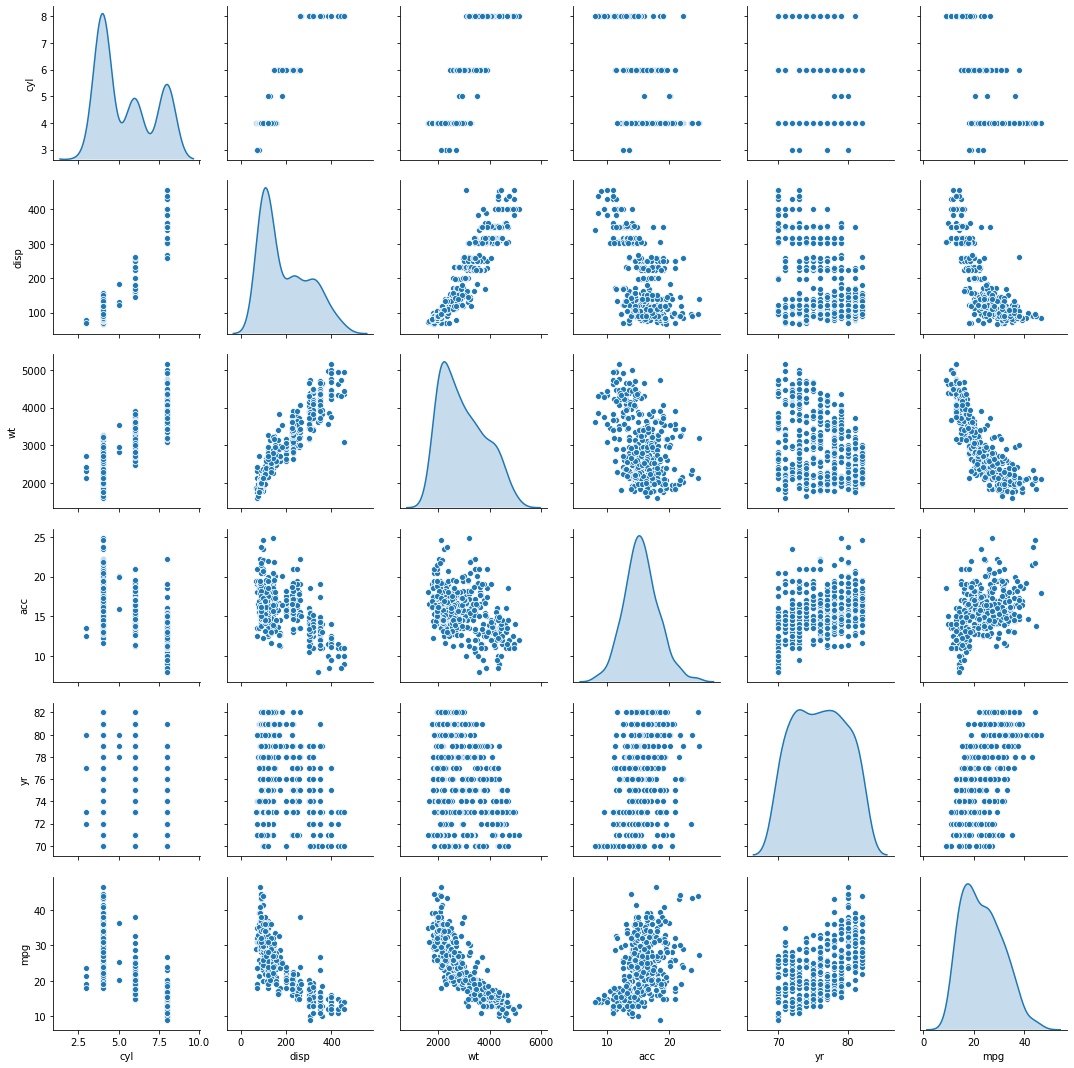

In [158]:
sns.pairplot(data = df, vars = ['cyl','disp','wt', 'acc','yr','mpg'], diag_kind = 'kde')
plt.show()

Observations
-------------------

1. From the pairplots, there are 2 or 3 clusters in the data

2. As the dataset is small, it is recommended to use Hierarchical Clusterring (Agglomerative Clustering). However we can use KMeans or Hierarchical Clustering but for large datasets KMeans and for small datasets Hierarchical Clustering is  recommended.

In [159]:
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import zscore

In [160]:
model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')

In [161]:
car_data_attr = df.drop(['car name', 'mpg'], axis = 1)

In [162]:
car_data_attr['hp'] = pd.to_numeric(car_data_attr['hp'], errors = 'coerce', downcast = 'float')

In [163]:
car_data_attr.dtypes

cyl       int64
disp    float64
hp      float32
wt        int64
acc     float64
yr        int64
dtype: object

In [164]:
car_data_attr.head()

,cyl,disp,hp,wt,acc,yr
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [165]:
car_data_attr.isnull().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
dtype: int64

# Normalize the Data

In [166]:
car_data_z = zscore(car_data_attr)

In [167]:
model.fit(car_data_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [168]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [169]:
car_data_attr['Labels'] = model.labels_

In [170]:
car_data_attr.groupby(['Labels']).count()

,cyl,disp,hp,wt,acc,yr
Labels,,,,,,
0,293,293,293,293,293,293
1,99,99,99,99,99,99


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025167EE2F98>,
      dtype=object)

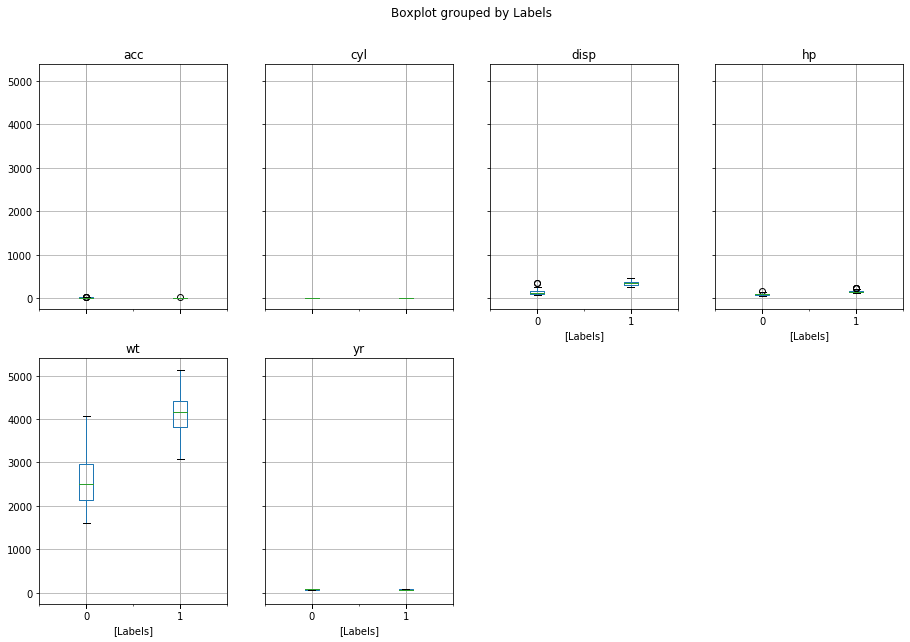

In [171]:
car_data_attr.boxplot(by = 'Labels',  layout=(2,4), figsize=(15, 10))

In [172]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [173]:
Z = linkage(car_data_attr, 'average')

In [174]:
Z

array([[3.77000000e+02, 3.78000000e+02, 7.00000000e-01, 2.00000000e+00],
       [6.50000000e+01, 8.50000000e+01, 1.00000000e+00, 2.00000000e+00],
       [1.80000000e+01, 2.90000000e+01, 1.00000000e+00, 2.00000000e+00],
       ...,
       [7.74000000e+02, 7.78000000e+02, 7.00542097e+02, 9.30000000e+01],
       [7.76000000e+02, 7.80000000e+02, 8.75861362e+02, 1.62000000e+02],
       [7.79000000e+02, 7.81000000e+02, 1.50108728e+03, 3.92000000e+02]])

In [175]:
c, coph_dists = cophenet(Z , pdist(car_data_attr))
c

0.7590006619139558

In [176]:
coph_dists

array([875.86136196,  78.00910966,  78.00910966, ..., 613.93955445,
       613.93955445, 345.2304189 ])

In [177]:
distDf = pd.DataFrame(list(coph_dists), columns=['clusterDist'])
distDf['ecludianDist'] = pdist(car_data_attr)

In [178]:
distDf.head()

,clusterDist,ecludianDist
0,875.861362,196.965098
1,78.009110,71.735626
2,78.009110,73.824115
3,78.009110,56.144902
4,875.861362,848.575866


In [179]:
distDf.corr()

,clusterDist,ecludianDist
clusterDist,1.000000,0.759001
ecludianDist,0.759001,1.000000


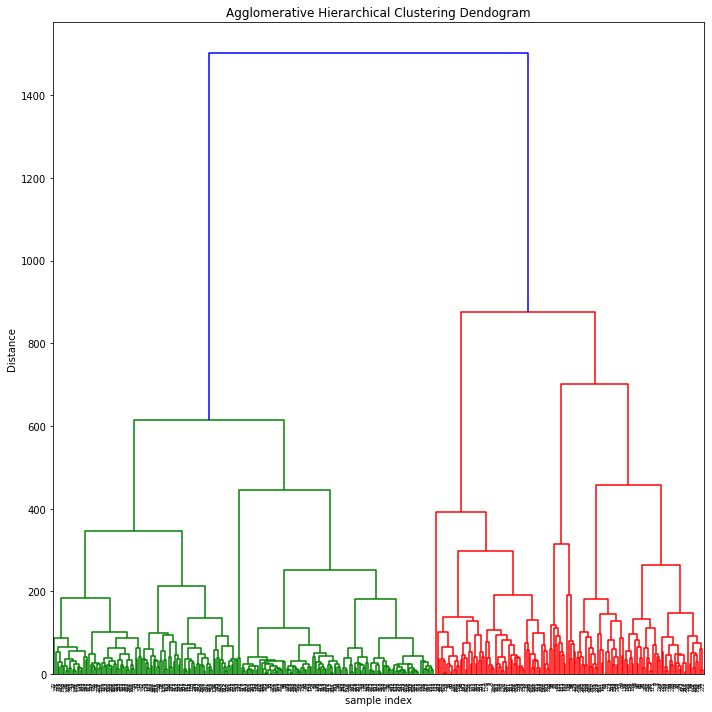

In [180]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

In [181]:
Z = linkage(car_data_attr, 'complete')
c, coph_dists = cophenet(Z , pdist(car_data_attr))
c

0.7855622254953326

In [182]:
distDf = pd.DataFrame(list(coph_dists), columns=['clusterDist'])
distDf['ecludianDist'] = pdist(car_data_attr)

distDf.head()

,clusterDist,ecludianDist
0,3543.811790,196.965098
1,107.498837,71.735626
2,107.498837,73.824115
3,107.498837,56.144902
4,3543.811790,848.575866


In [183]:
distDf.corr()

,clusterDist,ecludianDist
clusterDist,1.000000,0.785562
ecludianDist,0.785562,1.000000


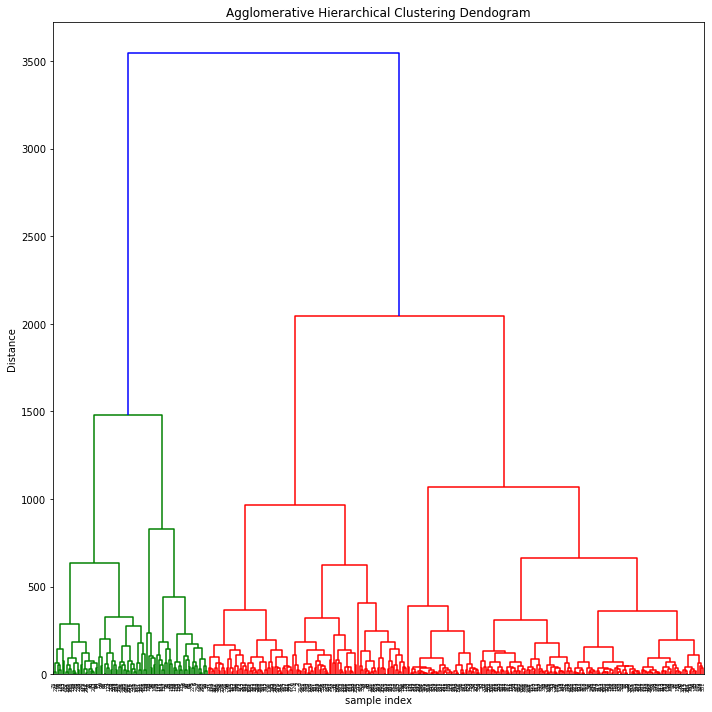

In [184]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

In [185]:
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

In [186]:
model.fit(car_data_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [187]:
car_data_attr['Labels1'] = model.labels_

In [188]:
car_data_attr.groupby(['Labels1']).count()

,cyl,disp,hp,wt,acc,yr,Labels
Labels1,,,,,,,
0,289,289,289,289,289,289,289
1,99,99,99,99,99,99,99
2,4,4,4,4,4,4,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025162AD57F0>,
      dtype=object)

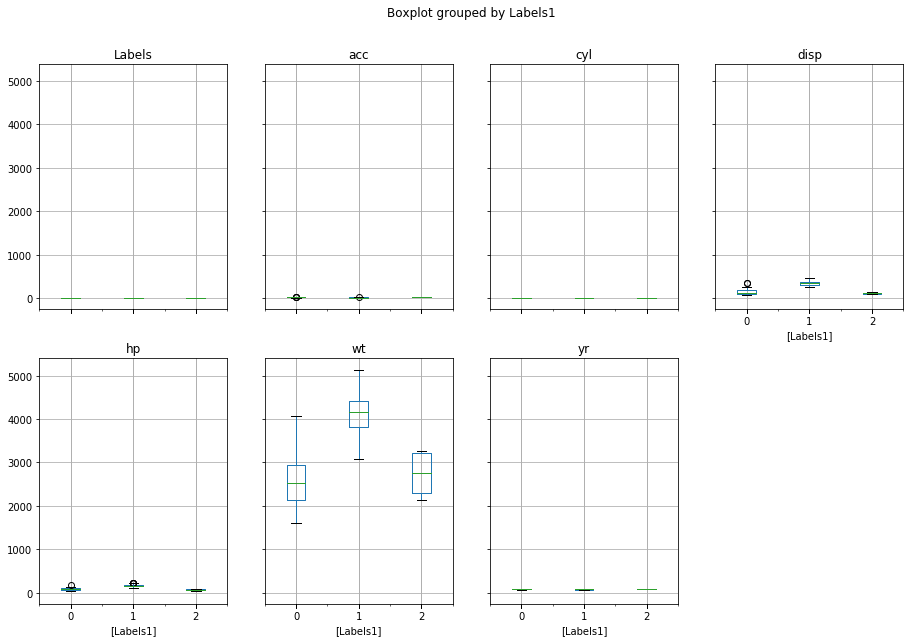

In [189]:
car_data_attr.boxplot(by = 'Labels1',  layout=(2,4), figsize=(15, 10))

Observations
-------------------

1. From the above boxplot, 3-clusters are not required for this data. 2-clusters is sufficient.

2. If we go for 3 clusters, only for 4 data points we are making a third cluster and most of them are single data points. So the Optimum number of clusters in this case is 2.

In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
car_data_attr.drop('Labels1', axis=1, inplace=True)

In [192]:
car_data_attr['mpg'] = df['mpg']

In [193]:
car_data_attr.head()

,cyl,disp,hp,wt,acc,yr,Labels,mpg
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0


In [194]:
filter1 = car_data_attr['Labels'] == 0

filter2 = car_data_attr['Labels'] == 1

In [195]:
cluster1_df = car_data_attr[filter1]

cluster2_df = car_data_attr[filter2]

In [196]:
cluster1_df.shape

(293, 8)

In [197]:
cluster2_df.shape

(99, 8)

# Model for Cluster1

In [198]:
X = cluster1_df.drop('mpg', axis = 1)

y = cluster1_df[['mpg']]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [200]:
model1 = LinearRegression()

In [201]:
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
model1.coef_

array([[ 1.07203649, -0.03432645, -0.08087804, -0.00506125, -0.13762869,
         0.78525331,  0.        ]])

In [203]:
model1.intercept_

array([-11.79138002])

# Model for Cluster-2

In [204]:
cluster2_df.head()

,cyl,disp,hp,wt,acc,yr,Labels,mpg
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0


In [205]:
X = cluster2_df.drop('mpg', axis = 1)

In [206]:
y = cluster2_df[['mpg']]

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [208]:
model2 = LinearRegression()

In [209]:
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
model2.coef_

array([[ 0.        ,  0.00720526, -0.02504734, -0.00272901, -0.192707  ,
         0.27344727,  0.        ]])

In [211]:
model2.intercept_

array([9.73270671])